# Importações e Configurações iniciais

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib.pyplot as plt # Import pyplot for plotting
import matplotlib
# Use the updated seaborn style name
plt.style.use('seaborn-v0_8-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

In [3]:
!pip install yfinance
import yfinance as yf

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# 1.Funções para busca e tratamento de dados do Tesouro Direto

In [5]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [6]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [7]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

# Preços e Taxas Históricas dos Titulos Negociados
Essa conjuntura de dados contém as taxas e preços dos titulos ofertados pelo Tesouro Direto. Repletem o mercado secundário de Titulos públicos deferais públicos federais.  

2.1 Buscando dados

In [8]:
titulos = busca_titulos_tesouro_direto()

In [9]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
                               2023-08-08               4.96   
                               2023-08-09               4.95   
                               2023-08-10               4.89   
                               2023-08-11               4.84   
                               2023-08-14               4.89   
...                                                      ...   
Tesouro Selic  2029-03-01      2025-01-30               0.10   
                               2025-01-31               0.11   
                               2025-02-03               0.11   
                               2025-02-04               0.10   
                               2025-02-05               0.11   
                               2025-02-06               0.11   
               2031-03-01      2025-02-03               0.11   
                               2025-02-04               0.11   
                               2025-02-05               0.12   
                               2025-02-06               0.12   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
                               2023-08-08              5.08          3267.47   
                               2023-08-09              5.07          3269.66   
                               2023-08-10              5.01          3279.31   
                               2023-08-11              4.96          3288.92   
                               2023-08-14              5.01          3282.20   
...                                                     ...              ...   
Tesouro Selic  2029-03-01      2025-01-30              0.11         15913.46   
                               2025-01-31              0.12         15921.20   
                               2025-02-03              0.12         15929.07   
                               2025-02-04              0.11         15937.14   
                               2025-02-05              0.12         15944.63   
                               2025-02-06              0.12         15950.99   
               2031-03-01      2025-02-03              0.12         15886.70   
                               2025-02-04              0.12         15894.28   
                               2025-02-05              0.13         15900.98   
                               2025-02-06              0.13         15906.38   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
                               2023-08-08         3248.97        3248.97  
                               2023-08-09         3251.16        3251.16  
                               2023-08-10         3260

# 2.2.Tesouro Selic

In [10]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

In [12]:
selic2027 = titulos.loc[('Tesouro Selic', '2025-03-01')]
selic2027


,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
2019-02-08,0.02,0.06,9939.25,9915.26,9912.76
2019-02-11,0.02,0.06,9941.70,9917.72,9915.22
2019-02-12,0.02,0.06,9944.16,9920.19,9917.68
2019-02-13,0.02,0.06,9946.61,9922.65,9920.15


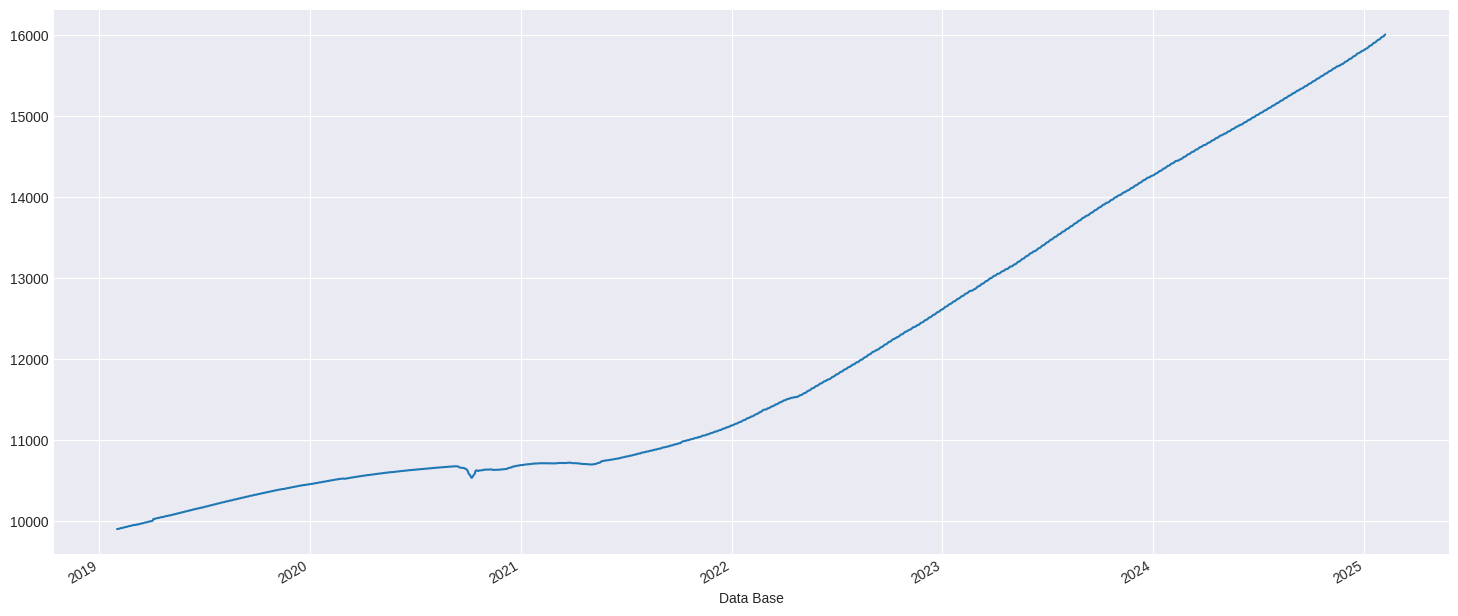

In [13]:
selic2027['PU Base Manha'].plot();

# 2.3 Pré-fixado 2023

In [15]:
pre2028 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2028

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.36,6.48,696.02,691.42,691.25
2020-02-11,6.26,6.38,700.05,695.42,695.25
2020-02-12,6.22,6.34,701.76,697.13,696.96
2020-02-13,6.28,6.40,699.61,695.00,694.82
2020-02-14,6.23,6.35,701.71,697.08,696.91
2020-02-17,6.19,6.31,703.43,698.79,698.62
2020-02-18,6.21,6.33,702.82,698.19,698.02
2020-02-19,6.24,6.36,701.83,697.21,697.04
2020-02-20,6.21,6.33,703.16,698.53,698.36


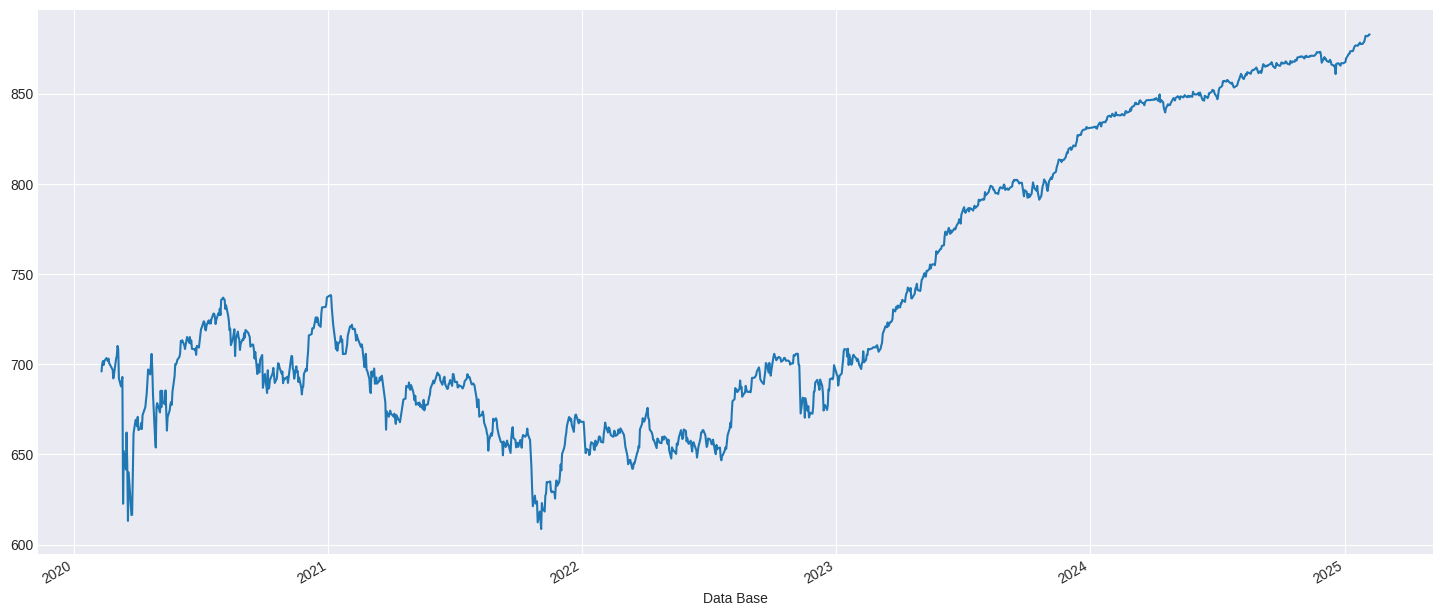

In [16]:
pre2028['PU Compra Manha'].plot();

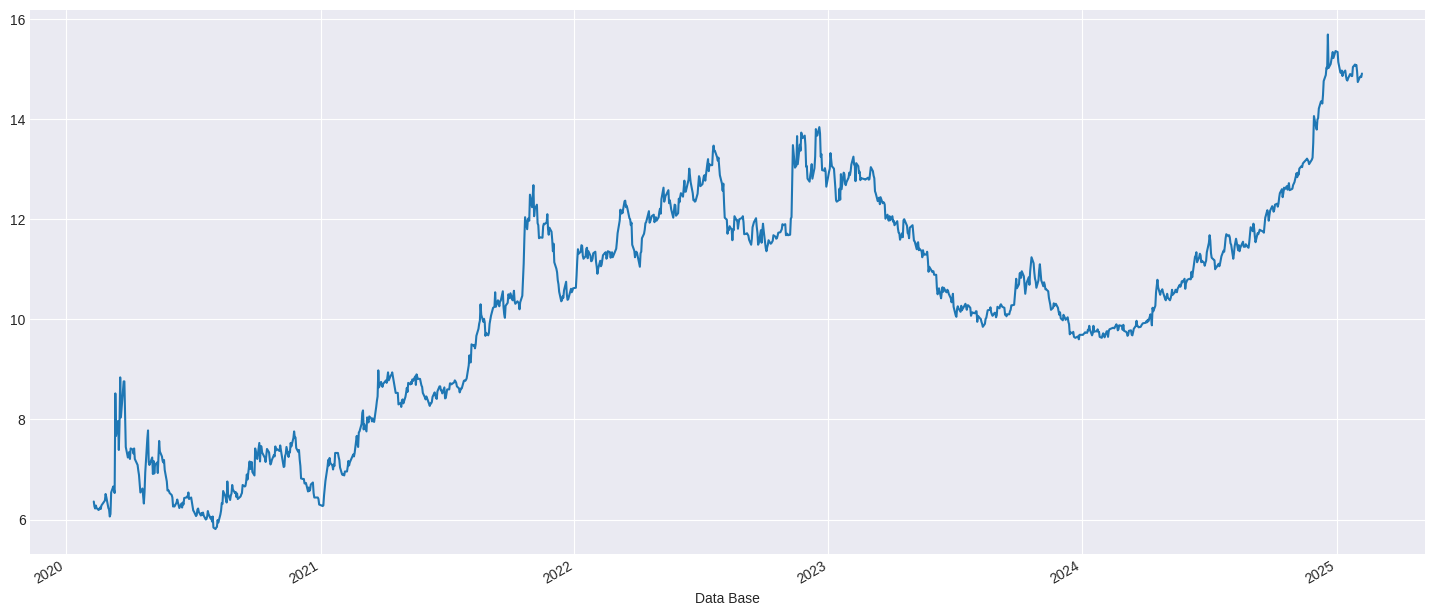

In [17]:
pre2028['Taxa Compra Manha'].plot();

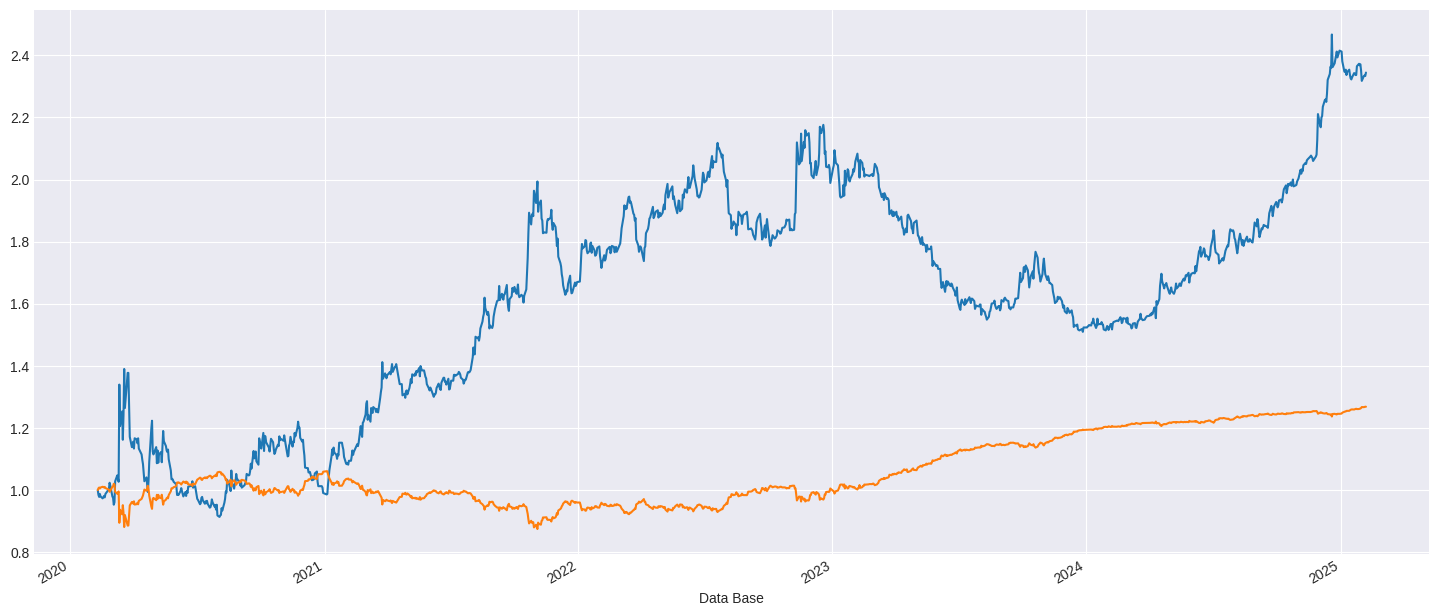

In [18]:
(pre2028['Taxa Compra Manha'] / pre2028['Taxa Compra Manha'].iloc[0]).plot();
(pre2028['PU Compra Manha'] / pre2028['PU Compra Manha'].iloc[0]).plot();

# 2.4 Pré-Fixado 2026

In [19]:
pre2028 = titulos.loc['Tesouro Prefixado', '2026-01-01']
pre2028

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.36,6.48,696.02,691.42,691.25
2020-02-11,6.26,6.38,700.05,695.42,695.25
2020-02-12,6.22,6.34,701.76,697.13,696.96
2020-02-13,6.28,6.40,699.61,695.00,694.82
2020-02-14,6.23,6.35,701.71,697.08,696.91
2020-02-17,6.19,6.31,703.43,698.79,698.62
2020-02-18,6.21,6.33,702.82,698.19,698.02
2020-02-19,6.24,6.36,701.83,697.21,697.04
2020-02-20,6.21,6.33,703.16,698.53,698.36


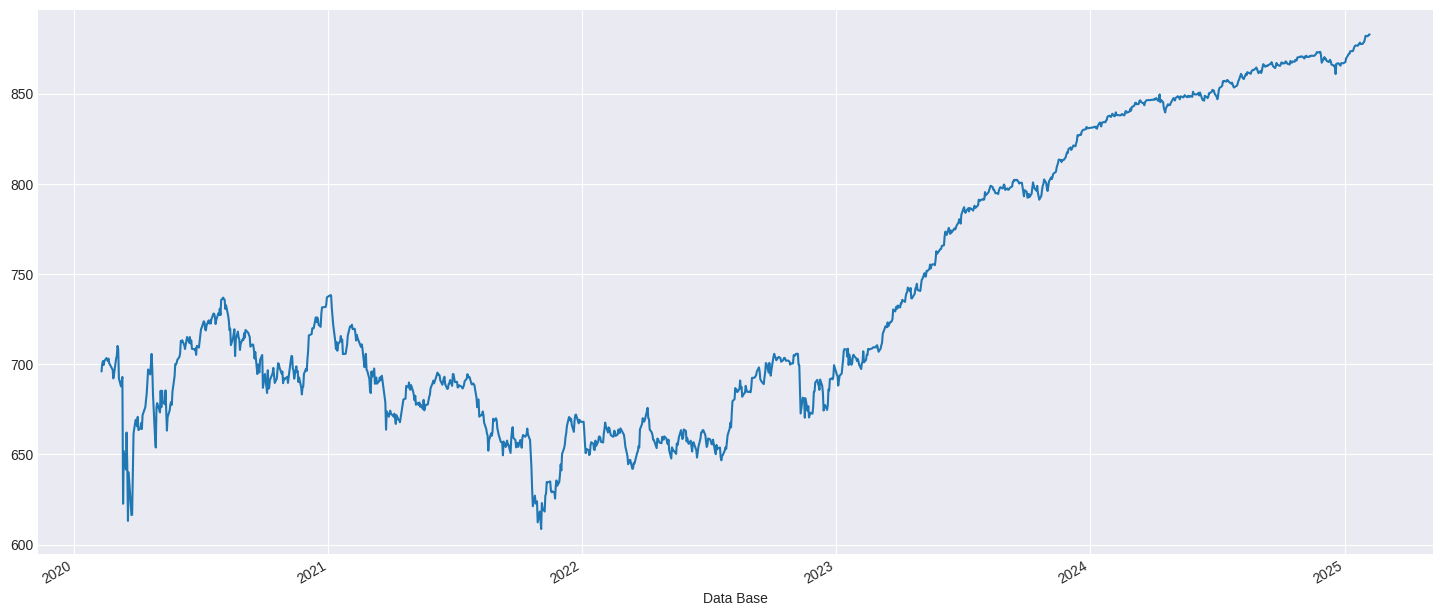

In [20]:
pre2028['PU Compra Manha'].plot();

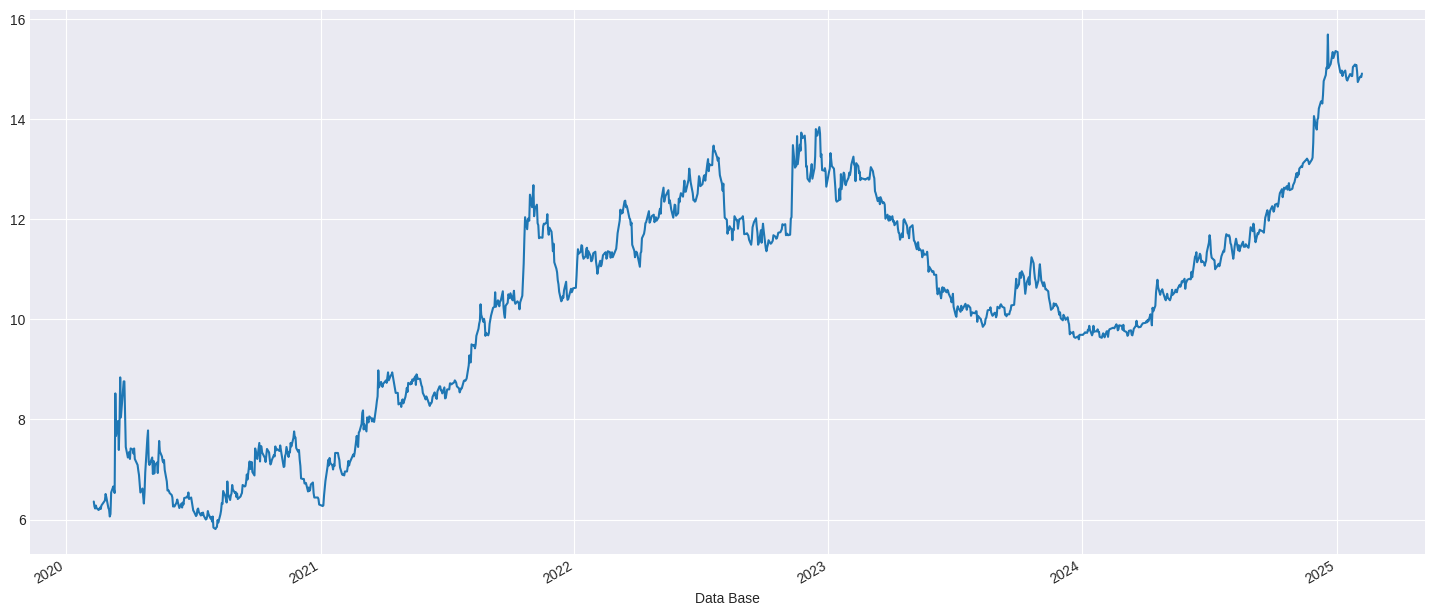

In [21]:
pre2028['Taxa Compra Manha'].plot();

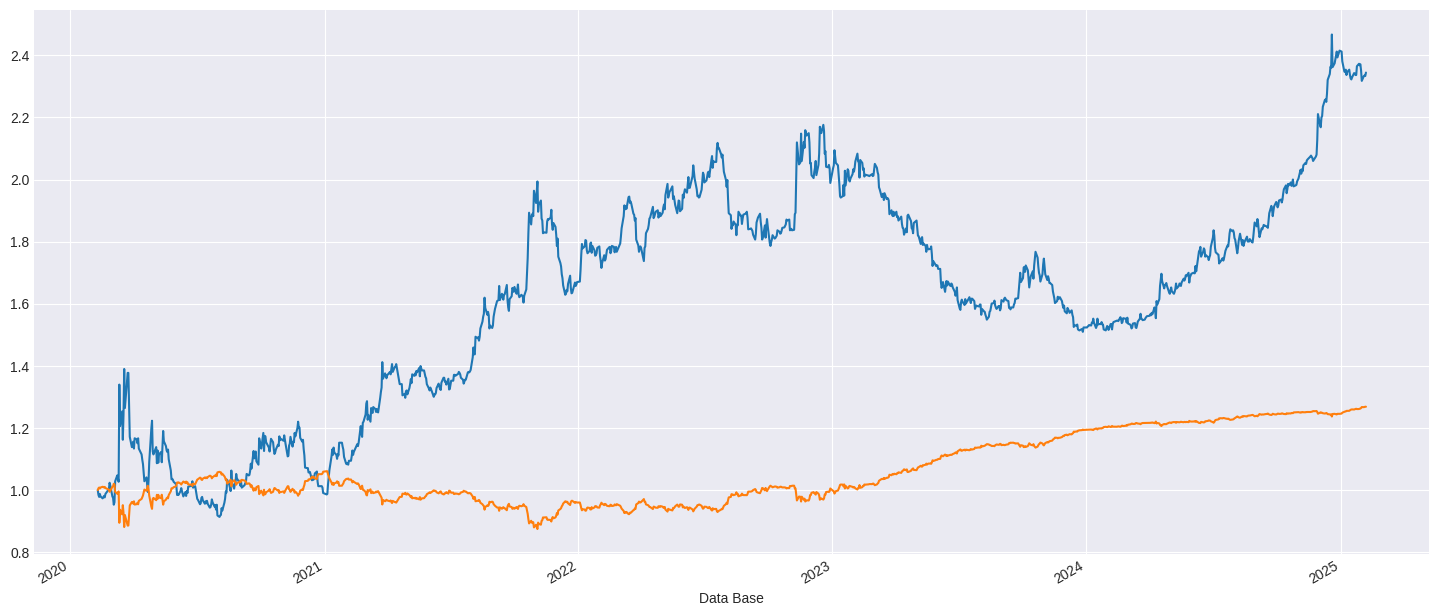

In [22]:
(pre2028['Taxa Compra Manha'] / pre2028['Taxa Compra Manha'].iloc[0]).plot();
(pre2028['PU Compra Manha'] / pre2028['PU Compra Manha'].iloc[0]).plot();

# 2.5 Pré-Fixado 2031 com Juros Semestrais

In [23]:
pre2031 = titulos.loc[('Tesouro Prefixado com Juros Semestrais','2031-01-01')]
pre2031

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.69,6.81,1257.57,1247.33,1247.00
2020-02-11,6.57,6.69,1268.26,1257.90,1257.57
2020-02-12,6.56,6.68,1269.45,1259.08,1258.76
2020-02-13,6.64,6.76,1262.85,1252.56,1252.23
2020-02-14,6.56,6.68,1270.09,1259.73,1259.40
2020-02-17,6.54,6.66,1272.15,1261.77,1261.45
2020-02-18,6.59,6.71,1268.13,1257.80,1257.48
2020-02-19,6.63,6.75,1265.00,1254.71,1254.39
2020-02-20,6.62,6.74,1266.18,1255.89,1255.56


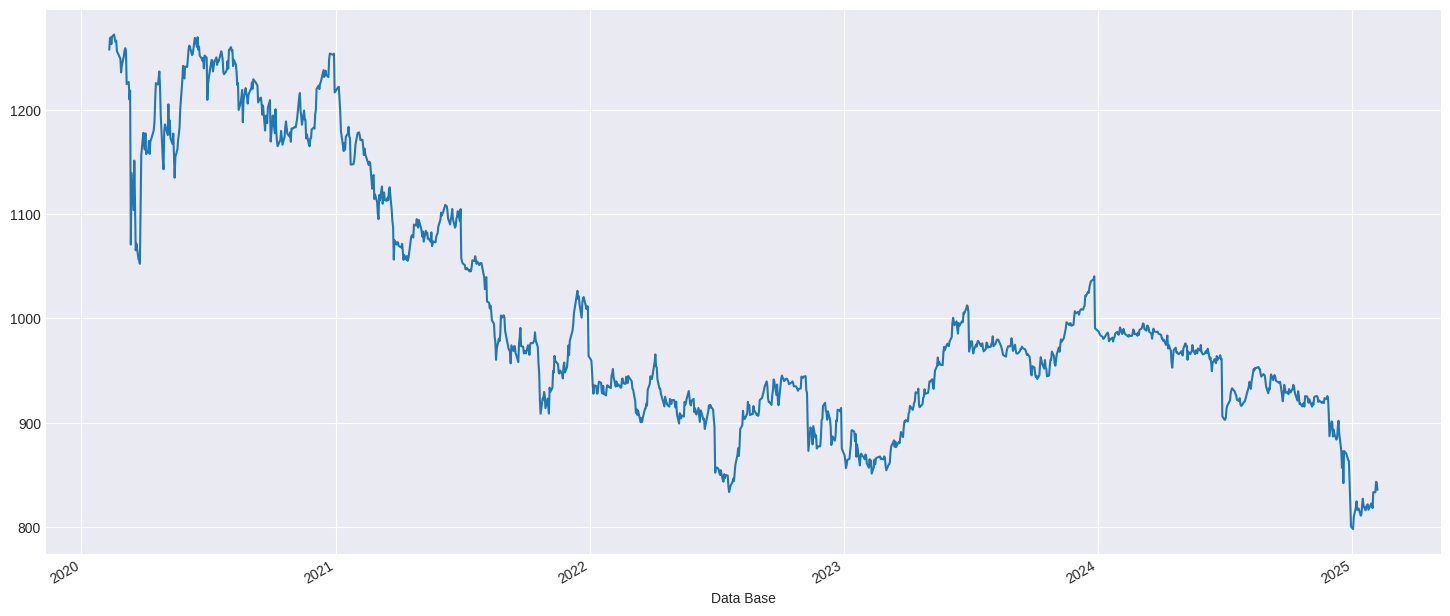

In [24]:
pre2031['PU Compra Manha'].plot();

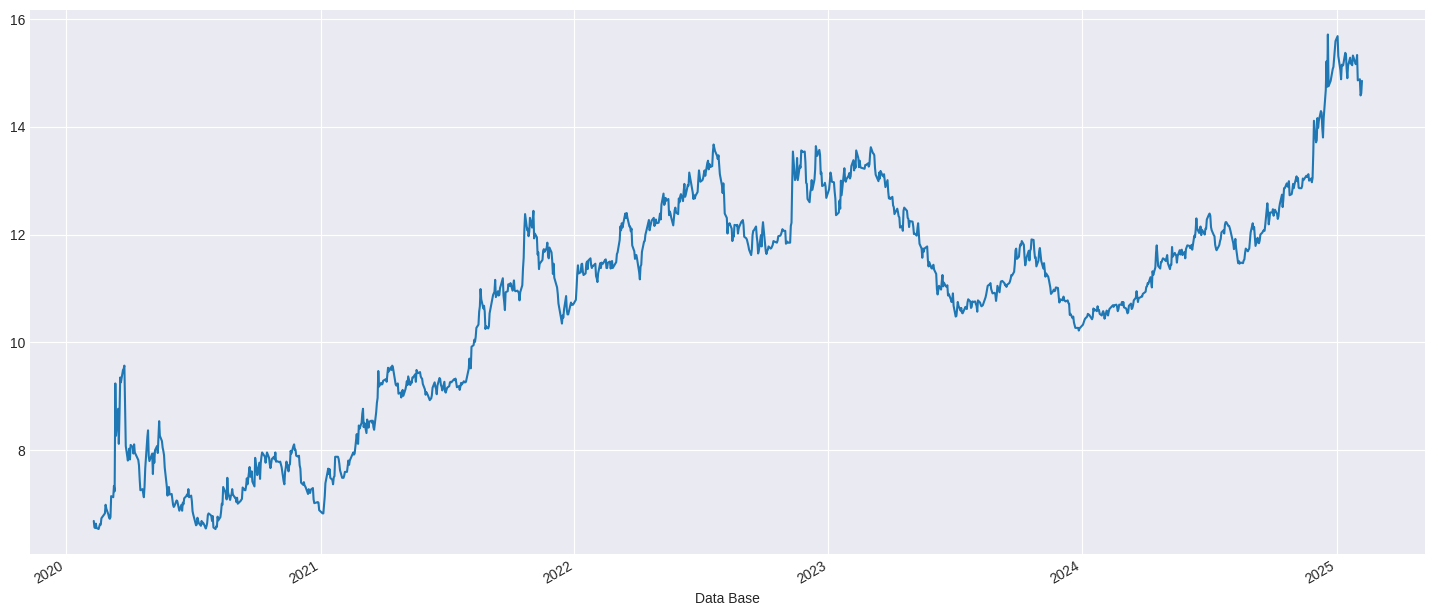

In [25]:
pre2031['Taxa Compra Manha'].plot();

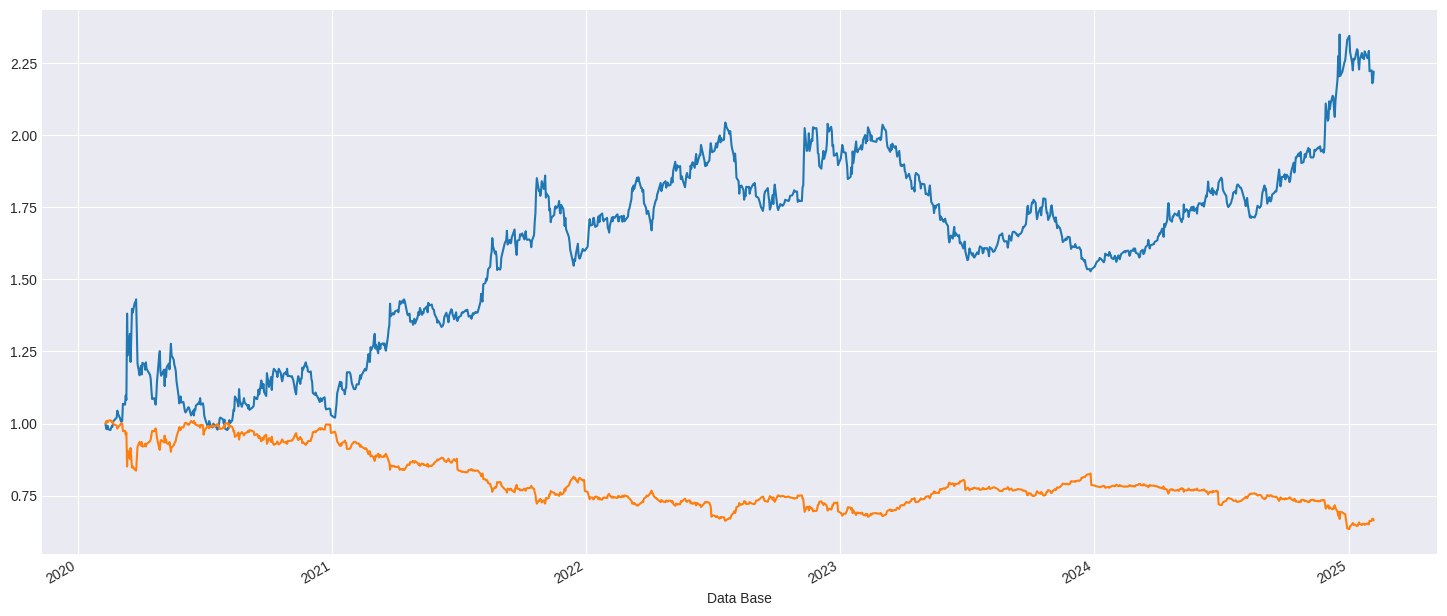

In [26]:
(pre2031['Taxa Compra Manha'] / pre2031['Taxa Compra Manha'].iloc[0]).plot();
(pre2031['PU Compra Manha'] / pre2031['PU Compra Manha'].iloc[0]).plot();



# 2.6 Tesouro IPCA+ 2026

In [27]:
ipca2026 = titulos.loc[('Tesouro IPCA+', '2026-08-15')]
ipca2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,2.65,2.77,2785.55,2764.50,2764.01
2020-02-11,2.58,2.70,2798.39,2777.24,2776.76
2020-02-12,2.56,2.68,2802.40,2781.23,2780.75
2020-02-13,2.58,2.70,2799.33,2778.20,2777.72
2020-02-14,2.54,2.66,2807.15,2785.97,2785.22
2020-02-17,2.49,2.61,2816.44,2795.20,2794.77
2020-02-18,2.53,2.65,2809.76,2788.58,2788.15
2020-02-19,2.56,2.68,2804.86,2783.74,2783.31
2020-02-20,2.50,2.62,2815.90,2794.70,2794.28


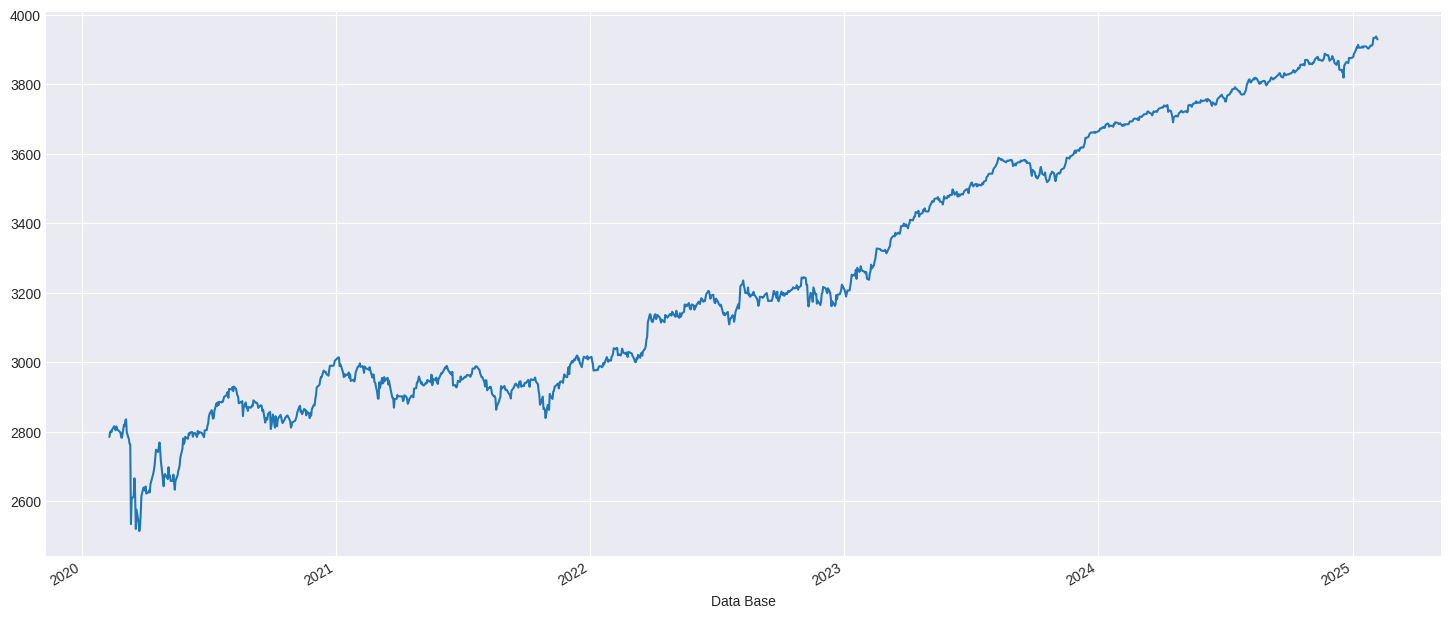

In [28]:
ipca2026['PU Compra Manha'].plot();

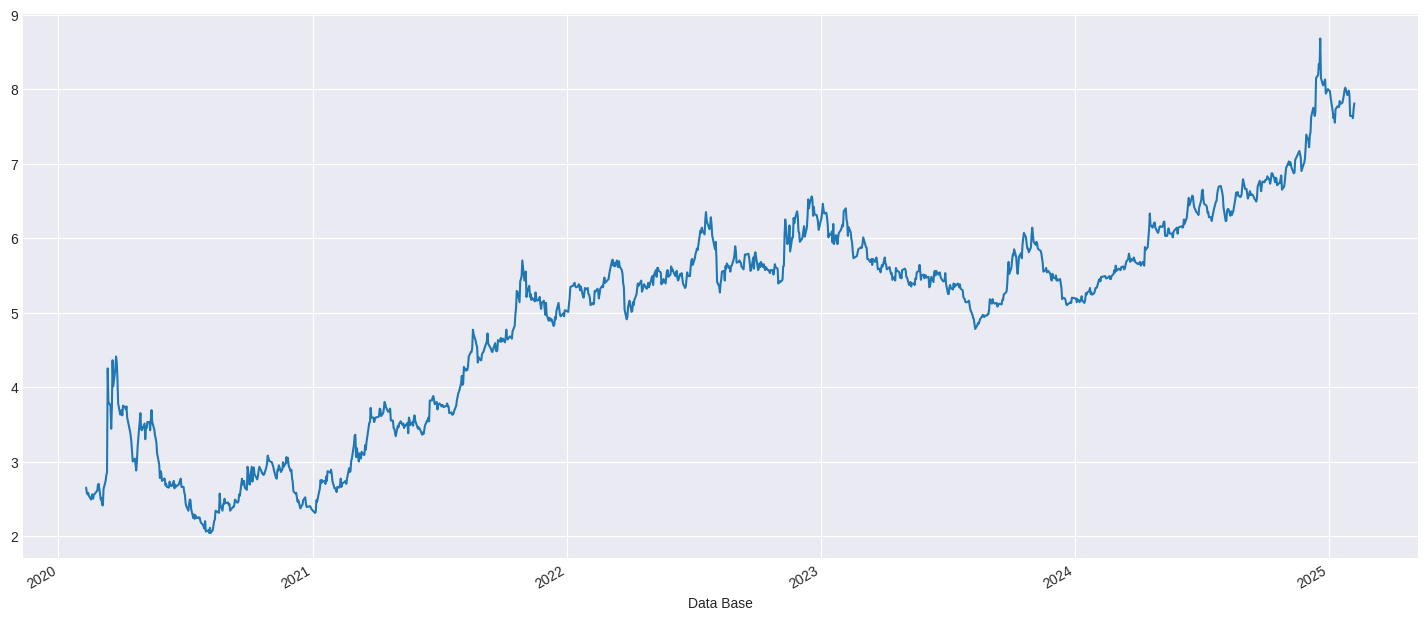

In [29]:
ipca2026['Taxa Compra Manha'].plot();

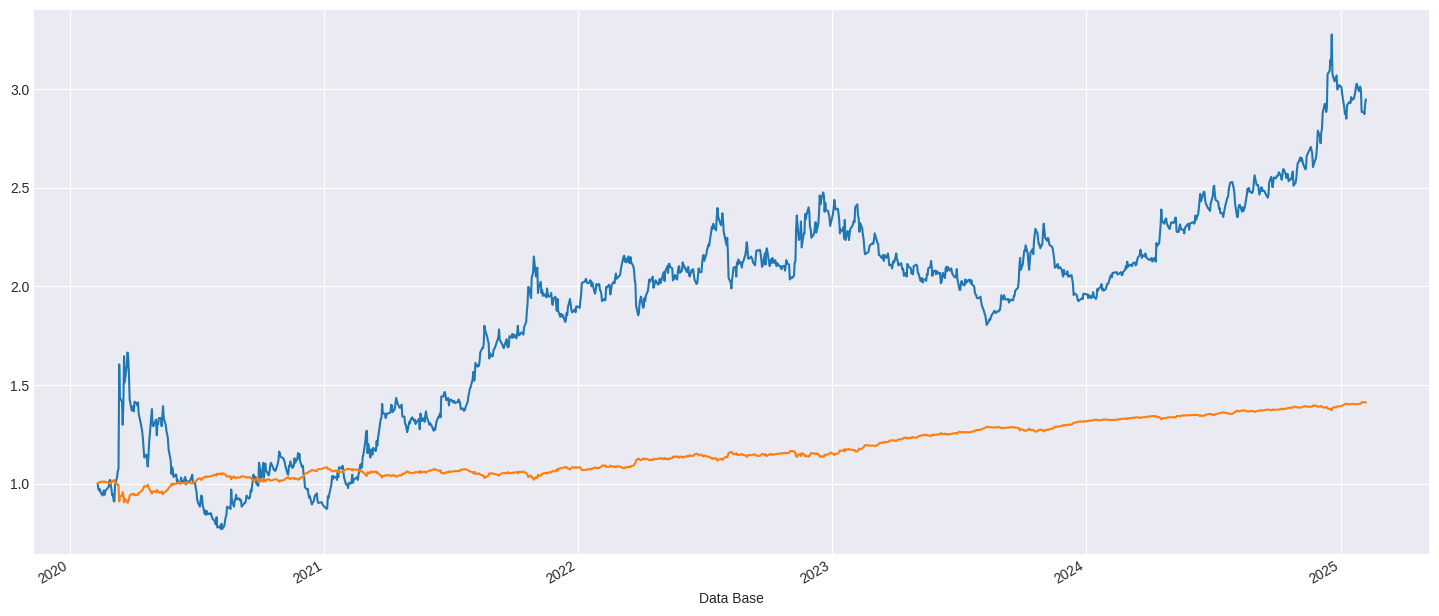

In [30]:
(ipca2026['Taxa Compra Manha'] / ipca2026['Taxa Compra Manha'].iloc[0]).plot();
(ipca2026['PU Compra Manha' ] / ipca2026['PU Compra Manha'].iloc[0]).plot();

# 2.7 Tesouro IPCA+ 2035

In [31]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2010-03-08,6.23,6.33,415.52,405.82,405.61
2010-03-09,6.25,6.35,413.78,404.12,403.91
2010-03-10,6.25,6.35,413.99,404.33,404.12
2010-03-11,6.25,6.35,414.20,404.54,404.33
2010-03-12,6.27,6.37,412.69,403.07,402.82
2010-03-15,6.28,6.38,411.87,402.27,402.12
2010-03-16,6.27,6.37,413.00,403.37,403.22
2010-03-17,6.26,6.36,414.13,404.47,404.32
2010-03-18,6.26,6.36,414.28,404.62,404.47


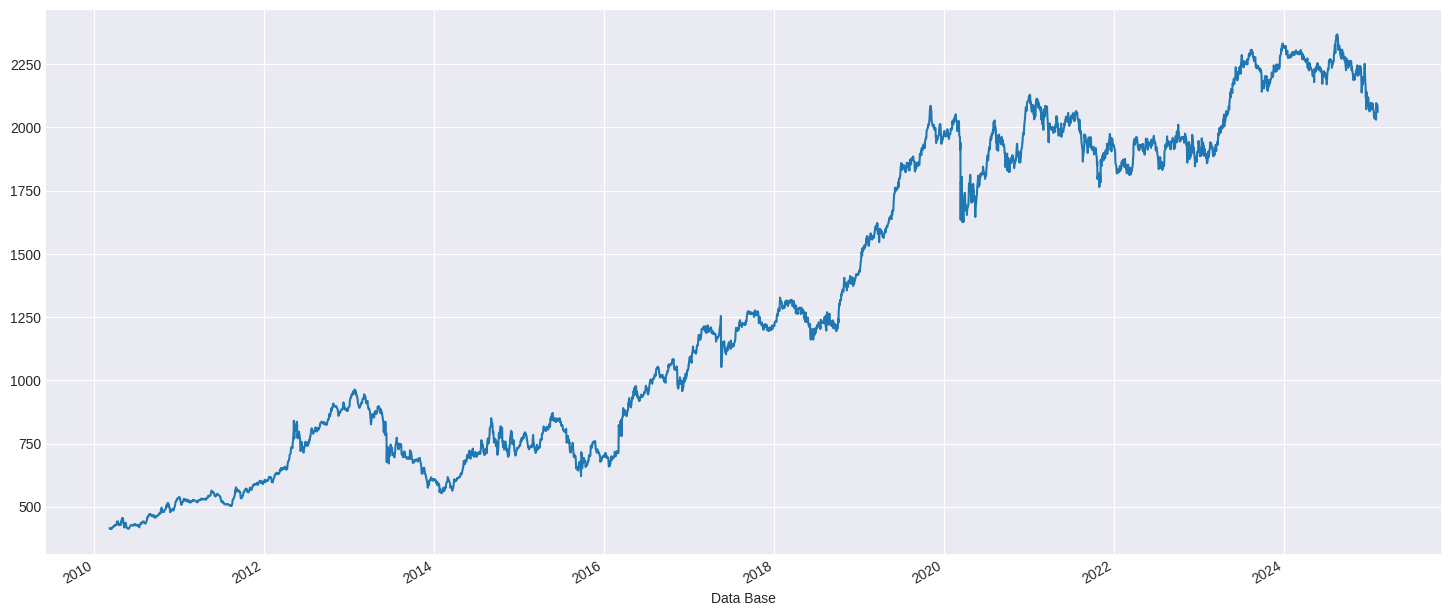

In [32]:
ipca2035['PU Compra Manha'].plot();

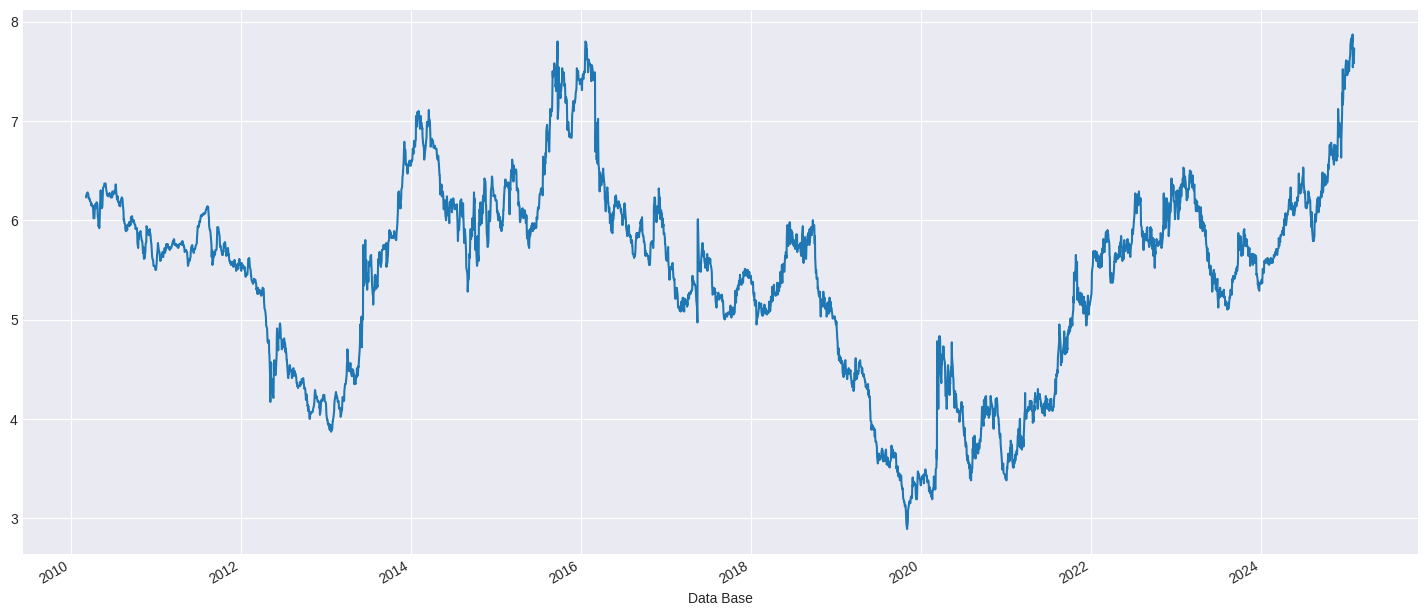

In [33]:
ipca2035['Taxa Compra Manha'].plot();

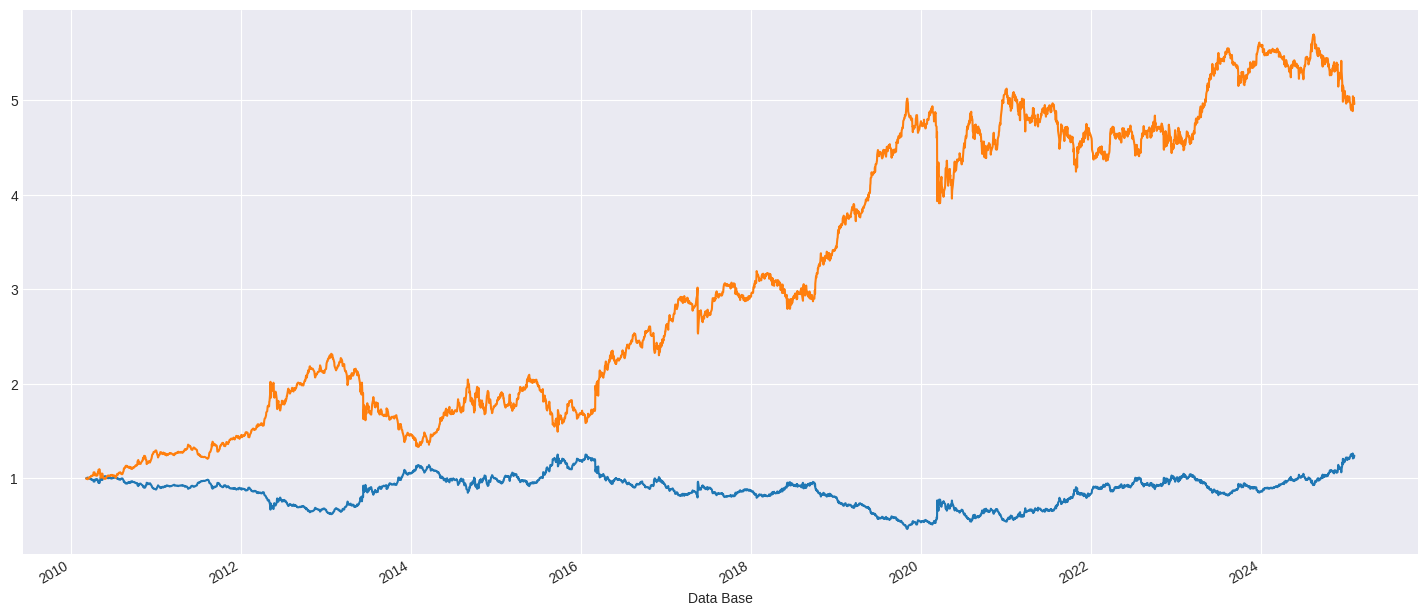

In [34]:
(ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot();
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot();


# 2.8 Tesouro IPCA+ 2045

In [35]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2017-02-08,5.34,5.46,685.78,664.14,663.92
2017-02-09,5.27,5.39,698.96,676.90,676.67
2017-02-10,5.21,5.33,710.67,688.23,687.84
2017-02-13,5.21,5.33,710.90,688.46,688.23
2017-02-14,5.22,5.34,709.23,686.85,686.62
2017-02-15,5.22,5.34,709.49,687.10,686.85
2017-02-16,5.25,5.37,704.09,681.88,681.62
2017-02-17,5.32,5.44,691.53,669.73,669.25
2017-02-20,5.27,5.39,701.09,678.98,678.73


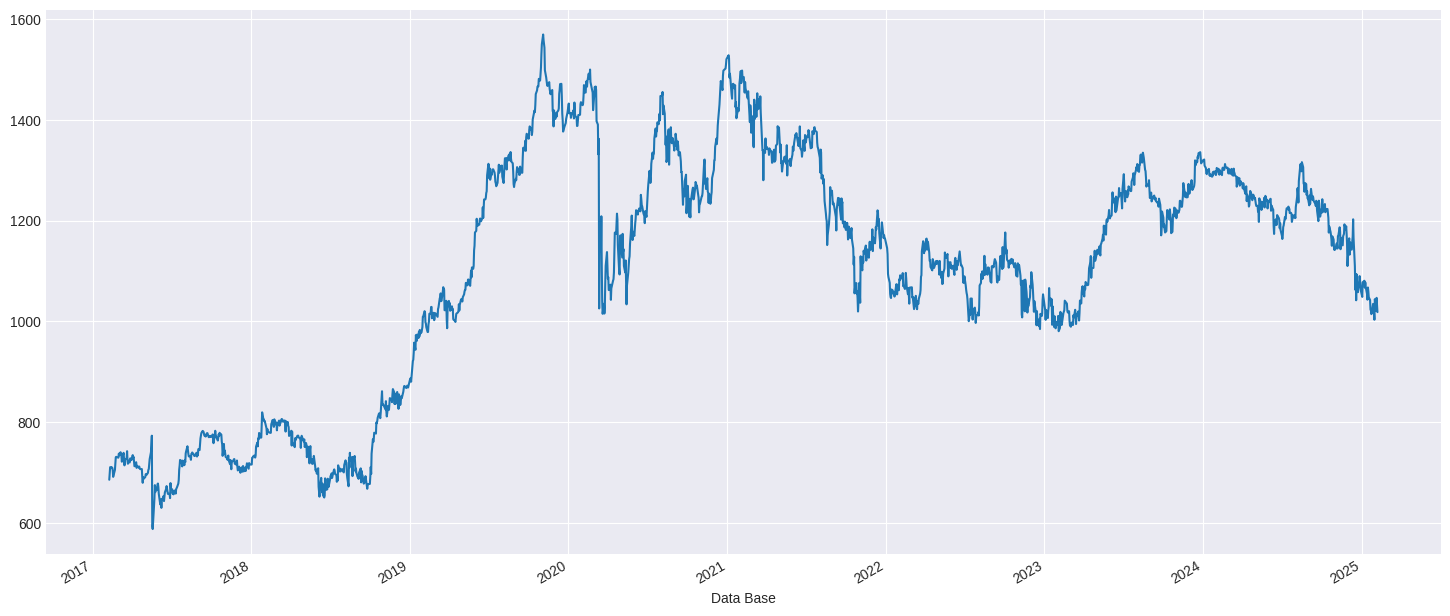

In [36]:
ipca2045['PU Compra Manha'].plot();

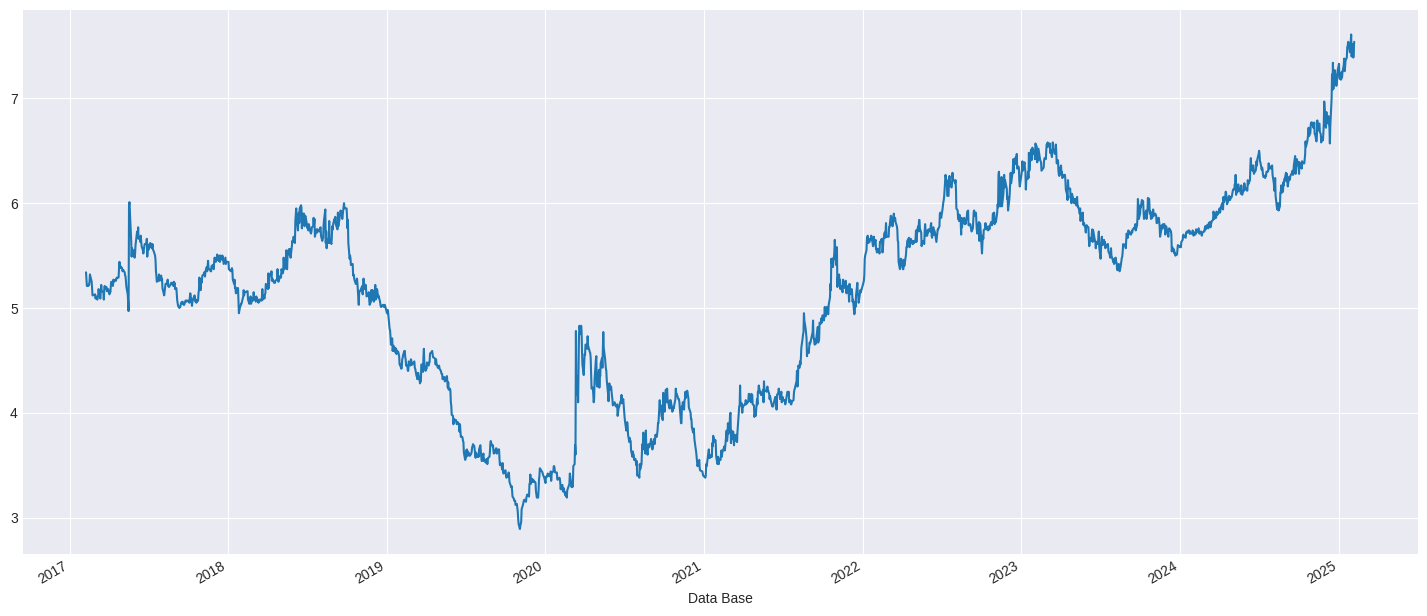

In [37]:
ipca2045['Taxa Compra Manha'].plot();

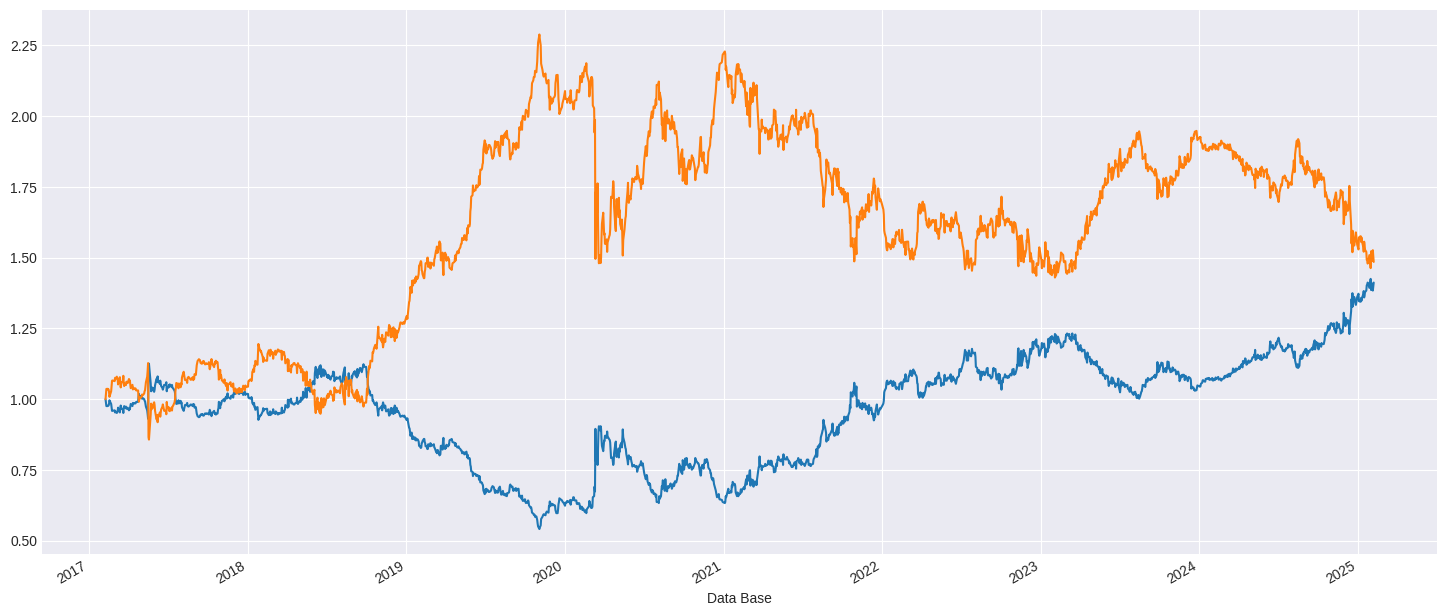

In [38]:
(ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot();
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot();

# 2.9 Tesouro IPCA+ 2055 com Juros Semestrais


In [39]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,3.42,3.54,5063.37,4956.73,4955.71
2020-02-11,3.36,3.48,5119.00,5010.64,5009.63
2020-02-12,3.36,3.48,5120.02,5011.66,5010.64
2020-02-13,3.40,3.52,5084.54,4977.32,4976.30
2020-02-14,3.37,3.49,5113.38,5005.31,5003.81
2020-02-17,3.34,3.46,5141.86,5032.93,5032.01
2020-02-18,3.37,3.49,5115.22,5007.16,5006.23
2020-02-19,3.37,3.49,5116.14,5008.08,5007.16
2020-02-20,3.34,3.46,5144.62,5035.70,5034.77


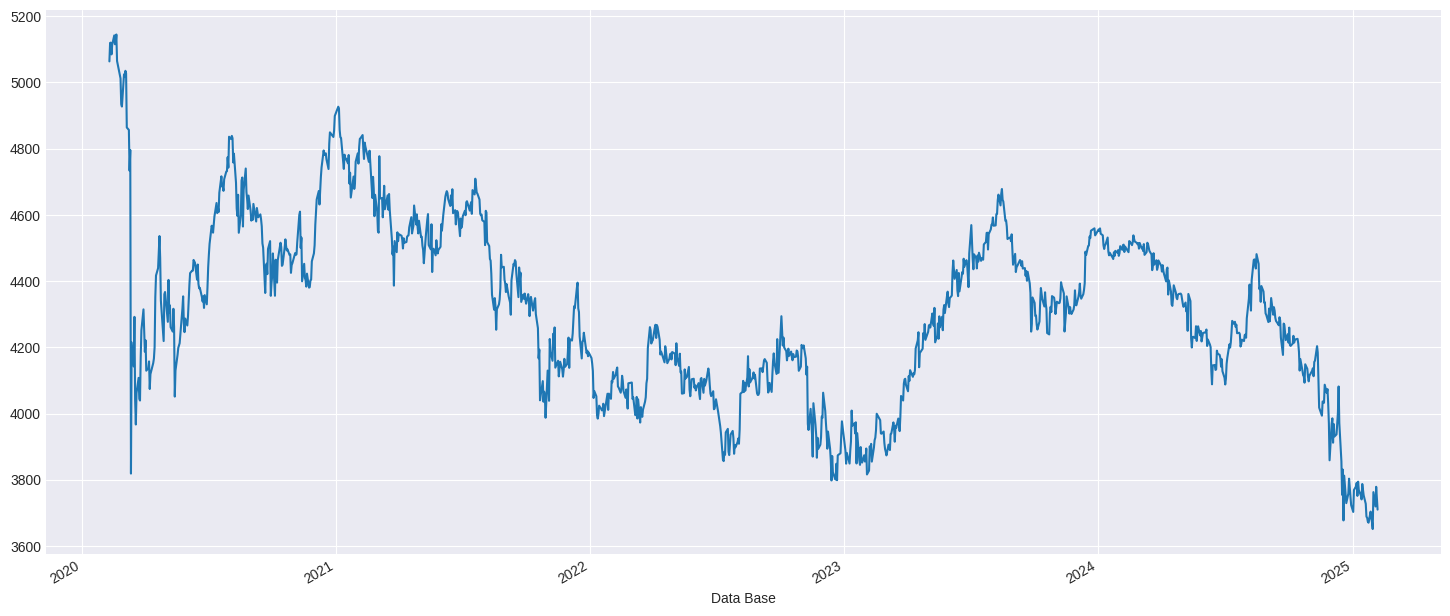

In [40]:
ipca2055['PU Compra Manha'].plot();

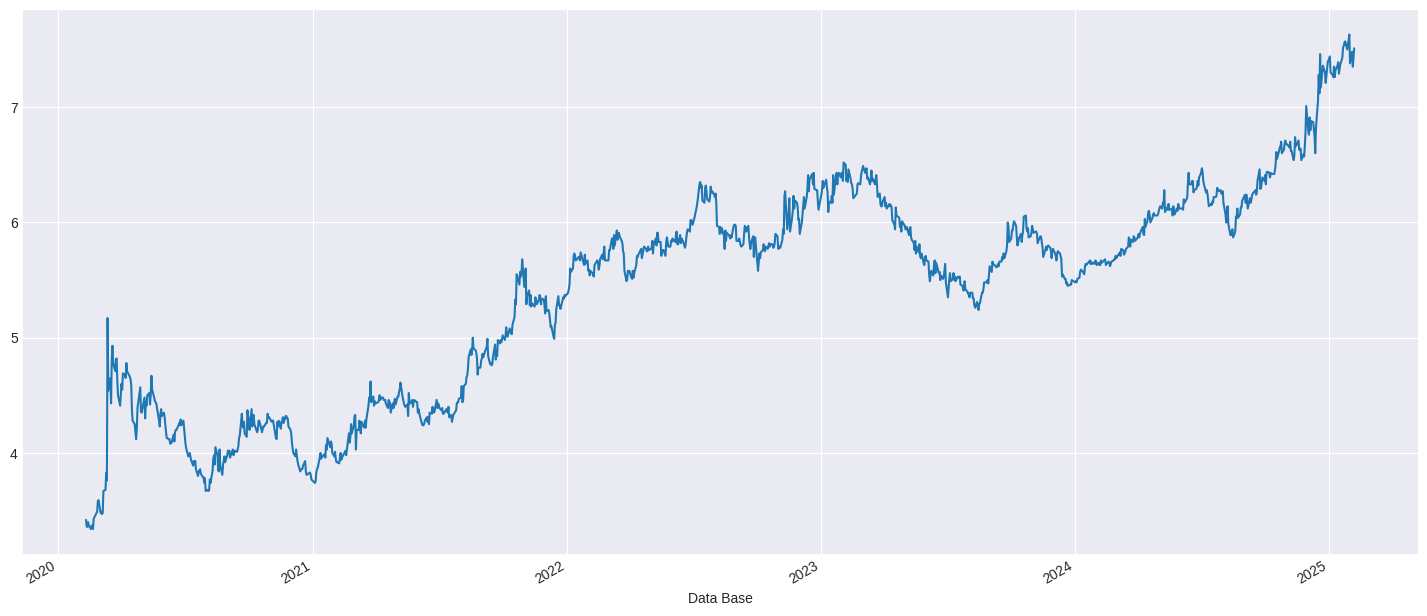

In [41]:
ipca2055['Taxa Compra Manha'].plot();

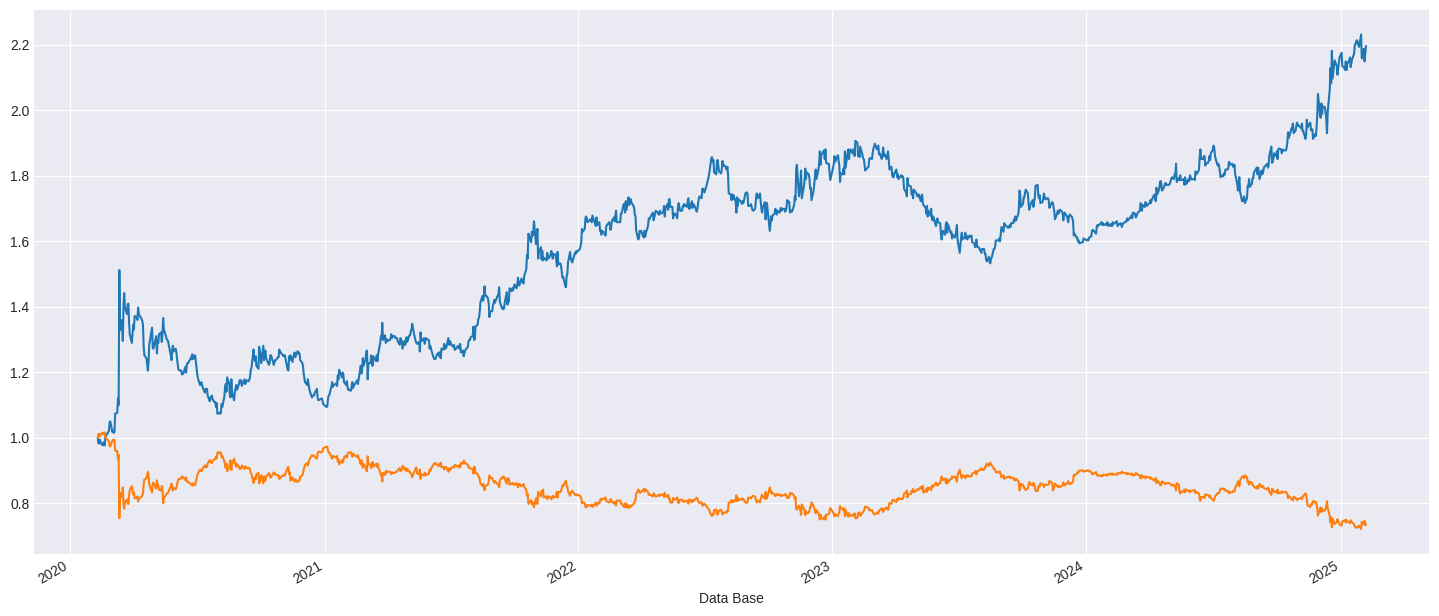

In [42]:
(ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot();
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot();


# 3. Vendas Tesouro Direto
Este conjunto de dados traz o volume de vendas diário do programa Direto

# 3.1 Buscando Dados

In [43]:
vendas = busca_vendas_tesouro()

In [44]:
vendas.sort_index(inplace=True)
vendas

PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
                                    2023-08-09   3269.745017      194.17   
                                    2023-08-10   3274.217156      146.53   
                                    2023-08-11   3280.013108      160.97   
                                    2023-08-14   3286.898059      187.56   
                                    2023-08-15   3280.731141       96.11   
...                                                      ...         ...   
Tesouro Selic  2029-03-01           2025-01-23  15868.980250     4896.27   
                                    2025-01-24  15876.462347     3948.35   
                                    2025-01-27  15883.872981     5145.49   
                                    2025-01-28  15891.252028     4485.96   
                                    2025-01-29  15898.423126     4091.59   
                                    2025-01-30  15905.782644     4681.17   
                                    2025-01-31  15913.451817     6106.71   
                                    2025-02-03  15921.193927     6960.86   
               2031-03-01           2025-02-04  15886.692380     5361.00   
                                    2025-02-05  15894.272666     5788.46   

                                                       Valor  
Tipo Titulo    Vencimento do Titulo Data Venda                
Tesouro Educa+ 2030-12-15           2023-08-02  1.077899e+06  
                                    2023-08-03  5.962986e+05  
                                    2023-08-04  5.134184e+05  
                                    2023-08-07  1.176050e+06  
                                    2023-08-08  7.434543e+05  
                                    2023-08-09  6.348864e+05  
                                    2023-08-10  4.797710e+05  
                                    2023-08-11  5.279837e+05  
                                    2023-08-14  6.164906e+05  
                                    2023-08-15  3.153111e+05  
...                                                      ...  
Tesouro Selic  2029-03-01           2025-01-23  7.769881e+07  
                                    2025-01-24  6.268583e+07  
                                    2025-01-27  8.173031e+07  
                                    2025-01-28  7.128752e+07  
                                    2025-01-29  6.504983e+07  
                                    2025-01-30  7.445767e+07  
                                    2025-01-31  9.717884e+07  
                                    2025-02-03  1.108252e+08  
               2031-03-01           2025-02-04  8.516856e+07  
                                    2025-02-05  9.200336e+07  

[85821 rows x 3 columns]

# 3.2 Gráficos

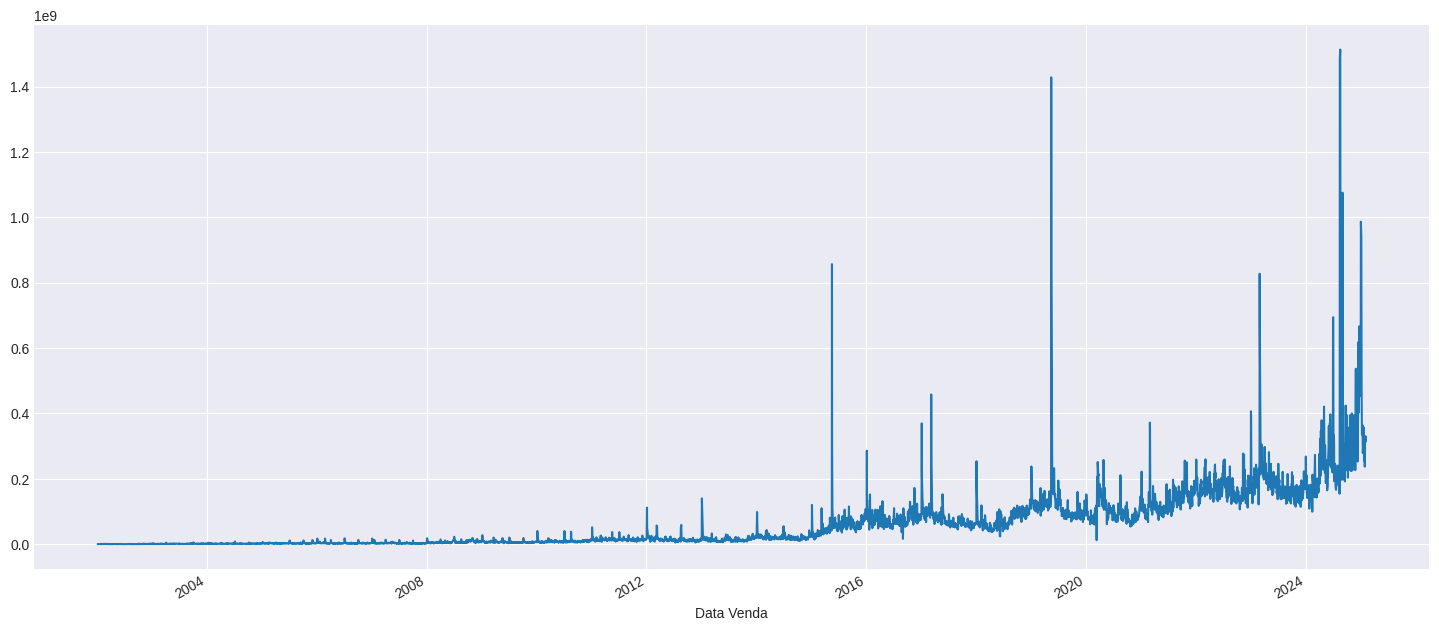

In [45]:
vendas['Valor'].groupby('Data Venda').sum().plot();

# 4.Recompras Tesouro Direto
Esse conjunto de dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento.Estão listados por dia e por título. Frequencia: Atualização diária com dados até dois dias antes á data do arquivo.

# 4.1 Busco Dados

In [46]:
recompras = busca_recompras_tesouro()

In [47]:
recompras.sort_index(inplace=True)
recompras

Quantidade        Valor
Tipo Titulo    Vencimento do Titulo Data Resgate                         
Tesouro Educa+ 2030-12-15           2023-10-02          2.22      7098.90
                                    2023-10-03          2.11      6732.51
                                    2023-10-04          4.65     14775.77
                                    2023-10-05          0.46      1462.84
                                    2023-10-06          0.20       633.19
                                    2023-10-09          2.52      8038.12
                                    2023-10-10          2.81      9004.14
                                    2023-10-11          3.07      9861.50
                                    2023-10-13         50.09    160484.82
                                    2023-10-16          2.95      9433.78
...                                                      ...          ...
Tesouro Selic  2029-03-01           2025-01-24       2535.06  40231573.61
                                    2025-01-27       3126.75  49644815.43
                                    2025-01-28       2399.13  38109454.09
                                    2025-01-29       2460.86  39107968.90
                                    2025-01-30       2477.35  39387878.68
                                    2025-01-31       2487.06  39561472.66
                                    2025-02-03       3323.40  52890985.69
                                    2025-02-04       2875.10  45779433.95
                                    2025-02-05       2732.36  43527636.76
               2031-03-01           2025-02-05          6.89    109437.21

[78394 rows x 2 columns]

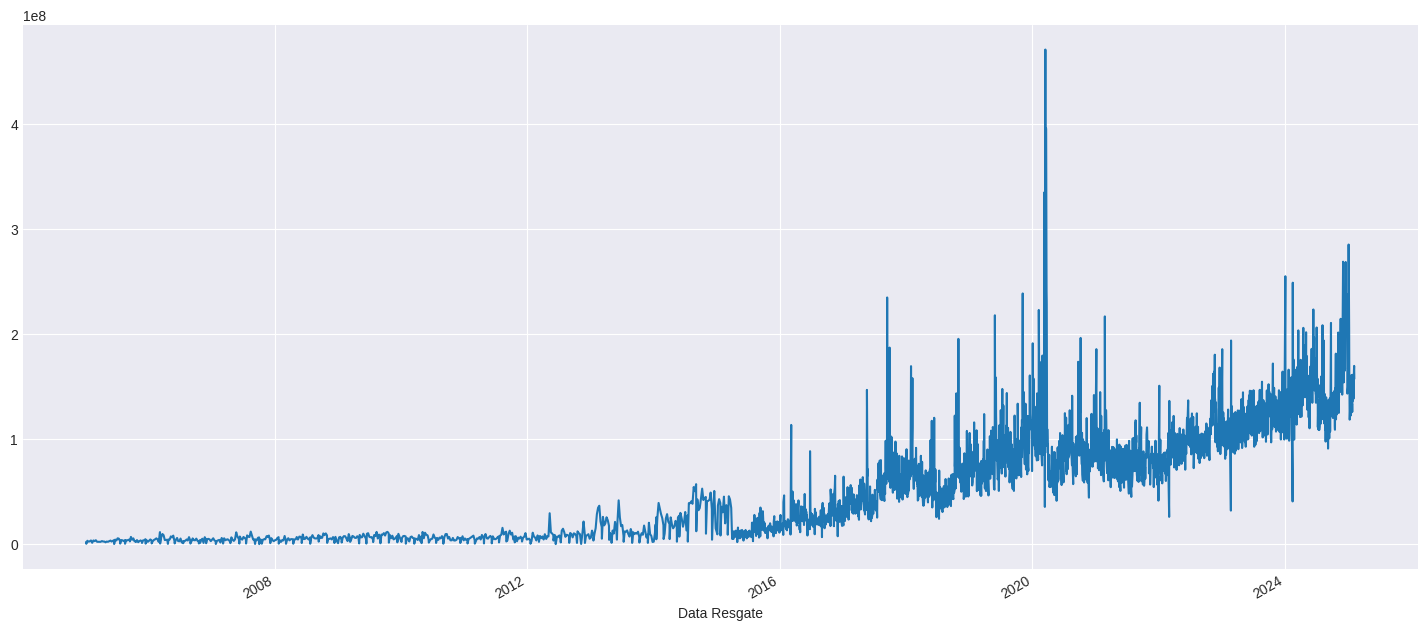

In [48]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

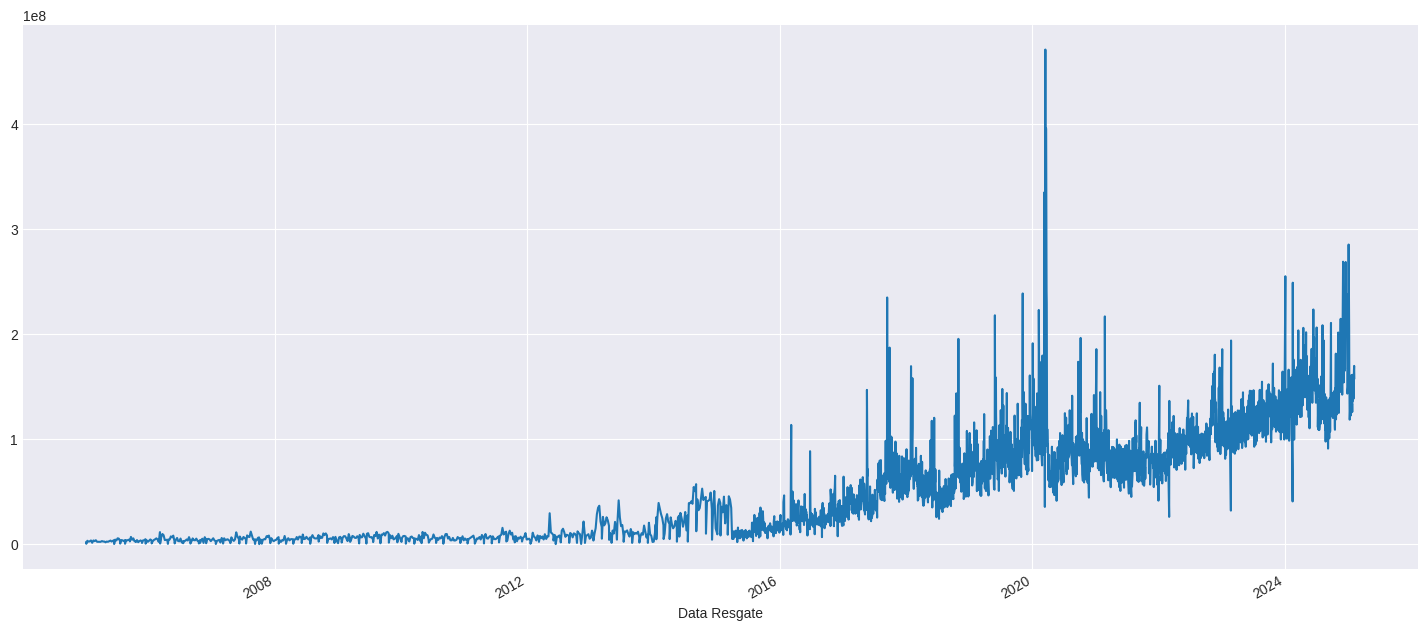

In [49]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

# 4.2 Recompras diárias Tesoura Selic 2025

In [50]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01' )]

In [51]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [52]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

In [53]:
fig = px.bar(data_frame=recompras_selic_semanal, x=recompras_selic_semanal.index, y='Valor')
fig.show()

# 4.3 Resgates Tesouro Selic vs Índice Bovespa

In [55]:
ibov = yf.download('^BVSP')['Close'].resample('W').last().pct_change()[1:]


[*********************100%***********************]  1 of 1 completed


In [56]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
2019-02-24,0.236251,0.003691
2019-03-03,0.423072,-0.033529
2019-03-10,-0.219953,0.008044
2019-03-17,1.231367,0.039553
2019-03-24,0.179772,-0.054490
2019-03-31,0.579274,0.017923
2019-04-07,-0.185600,0.017744
2019-04-14,0.124599,-0.043591
2019-04-21,0.030708,0.018336
2019-04-28,0.232518,0.017531


In [57]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index, y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index, y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [58]:
selic_ibov.corr()

,Recompra(%),IBOV(%)
Recompra(%),1.000000,-0.194711
IBOV(%),-0.194711,1.000000
